In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-take-off-data-jfk-airport/M1_final.csv


In [51]:
# importing useful libraries
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [52]:
# reading tha dataset and preprocessong it.
df = pd.read_csv("../input/flight-take-off-data-jfk-airport/M1_final.csv")
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [53]:
df.shape

(28820, 23)

In [54]:
df.drop('TAIL_NUM',axis=1,inplace=True)

In [55]:
df.shape

(28820, 22)

In [56]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df.OP_UNIQUE_CARRIER=label_encoder.fit_transform(df.OP_UNIQUE_CARRIER)
df["DEST"]= label_encoder.fit_transform(df["DEST"])
df["Wind"]= label_encoder.fit_transform(df["Wind"].astype(str))
df["Condition"]= label_encoder.fit_transform(df["Condition"])
df["Dew Point"]= label_encoder.fit_transform(df["Dew Point"])

In [57]:
# splitting the dataset 90:10 for test and train purpose

x = df.drop(['TAXI_OUT'],axis = 1)
x.head()
df.shape

(28820, 22)

In [58]:
y = df.TAXI_OUT
y.shape

(28820,)

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1)

In [60]:
# linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_le=LinearRegression()
lr_le=lr_le.fit(x_train,y_train)
y_real = lr_le.predict(x_test)

lrerror = mean_squared_error(y_test,y_real,squared = False)
lrerror

6.655329615190895

In [61]:
#Ridge Regression

from sklearn import linear_model
rr_le = linear_model.Ridge(alpha= 1, max_iter= 1000, tol = 0.01)
rr_le.fit(x_train, y_train)
pred1= rr_le.predict(x_test)
r_error= mean_squared_error(y_test, pred1, squared = False)
r_error

6.655330137375622

In [62]:
#Lasso Regression

lsoreg=linear_model.Lasso(alpha=1,max_iter=1000,tol=.01)
lsoreg.fit(x_train,y_train)
pred2=lsoreg.predict(x_test)
lsoerror=mean_squared_error(y_test,pred2,squared = False)
lsoerror

6.709792790567764

In [63]:
# KNN Model

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 200)
knn.fit(x_train,y_train)
pred3=knn.predict(x_test)
knnerror = mean_squared_error(y_test,pred3,squared = False)
knnerror

6.680031798965024

In [64]:
# SVR Model

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
scl1=StandardScaler()
scl2=StandardScaler()
x1=x_train.copy()
x2=x_test.copy()
x1=scl1.fit_transform(x1)
x2=scl2.fit_transform(x2)
svr=SVR()
svr.fit(x1,y_train)
pred4=svr.predict(x2)
svrerror=mean_squared_error(y_test,pred4,squared = False)
svrerror

6.414580595117846

In [65]:
# Naive Bayes Model

from sklearn.linear_model import BayesianRidge
nb=BayesianRidge()
nb.fit(x_train,y_train)
pred5=nb.predict(x_test)
nberror=mean_squared_error(y_test,pred5,squared=False)
nberror

6.655689338186183

In [66]:
# Light GBM Model

from lightgbm import LGBMRegressor
lgbm=LGBMRegressor()
lgbm.fit(x_train,y_train)
pred6=lgbm.predict(x_test)
lgbmerror=mean_squared_error(y_test,pred6,squared=False)
lgbmerror

5.796860465654389

In [67]:
# Random Forests Model

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)
pred7 = rf.predict(x_test)
rferror = mean_squared_error(y_test,pred7,squared = False)
rferror

5.7361070885728145

In [68]:
# Now applying models with One Hot Encoding

from sklearn.preprocessing import OneHotEncoder
p = (df.dtypes == 'object')
cols = list(p[p].index)
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_df = pd.DataFrame(OH_encoder.fit_transform(df[cols]))
OH_cols_df.index = df.index
num_df = df.drop(cols, axis=1)
OH_df = pd.concat([num_df, OH_cols_df], axis=1)
OH_df.head()
y=OH_df.TAXI_OUT
x=OH_df.drop(['TAXI_OUT'], axis =1)

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.1)

In [70]:
# Linear Regression

lr_ohe=LinearRegression()
lr_ohe.fit(x_train,y_train)
predic=lr_ohe.predict(x_test)
lrerror2=mean_squared_error(y_test,predic,squared = False)
lrerror2

6.504573601292507

In [71]:
# Ridge Regression

rr_ohe=linear_model.Ridge(alpha=1,max_iter=1000,tol=.01)
rr_ohe.fit(x_train,y_train)
predic1=rr_ohe.predict(x_test)
r_error2=mean_squared_error(y_test,predic1,squared = False)
r_error2

6.504585372226687

In [72]:
# Lasso Regression

lsoreg_ohe=linear_model.Lasso(alpha=1,max_iter=1000,tol=.01)
lsoreg_ohe.fit(x_train,y_train)
predic2=lsoreg_ohe.predict(x_test)
lsoerror2=mean_squared_error(y_test,predic2,squared = False)
lsoerror2

6.561489698044452

In [73]:
# KNN Model

knn_ohe = KNeighborsRegressor(n_neighbors = 200)
knn_ohe.fit(x_train,y_train)
predic3=knn_ohe.predict(x_test)
knnerror2 = mean_squared_error(y_test,predic3,squared = False)
knnerror2

6.538161268724572

In [74]:
# SVR Model

sc1=StandardScaler()
sc2=StandardScaler()
x1=x_train.copy()
x2=x_test.copy()
x1=sc1.fit_transform(x1)
x2=sc2.fit_transform(x2)
svr_ohe=SVR()
svr_ohe.fit(x1,y_train)
predic4=svr_ohe.predict(x2)
svrerror2=mean_squared_error(y_test,predic4,squared = False)
svrerror2

6.24207153189294

In [75]:
# Naive Bayes Model

nb_ohe=BayesianRidge()
nb_ohe.fit(x_train,y_train)
predic5=nb_ohe.predict(x_test)
nberror2=mean_squared_error(y_test,predic5,squared=False)
nberror2

6.506909958055706

In [76]:
# Light GBM Model

lgbm_ohe=LGBMRegressor()
lgbm_ohe.fit(x_train,y_train)
predic6=lgbm_ohe.predict(x_test)
lgbmerror2=mean_squared_error(y_test,predic6,squared=False)
lgbmerror2

5.656697596168019

In [77]:
# Random Forests Model

rf_ohe = RandomForestRegressor(n_estimators=100)
rf_ohe.fit(x_train,y_train)
predic7 = rf_ohe.predict(x_test)
rferror2 = mean_squared_error(y_test,predic7,squared = False)
rferror2

5.492658326279142

<function matplotlib.pyplot.show(close=None, block=None)>

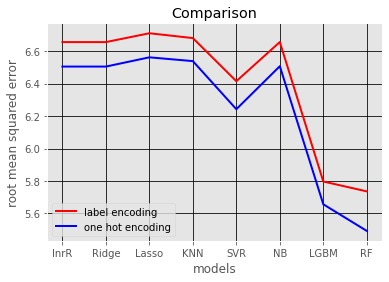

In [78]:
from matplotlib import style
error1=np.array([lrerror,r_error,lsoerror,knnerror,svrerror,nberror,lgbmerror,rferror])
error2=np.array([lrerror2,r_error2,lsoerror2,knnerror2,svrerror2,nberror2,lgbmerror2,rferror2])
style.use("ggplot")
plt.plot(["lnrR","Ridge","Lasso","KNN","SVR","NB","LGBM","RF"],error1,"r",label="label encoding",linewidth=2)
plt.plot(["lnrR","Ridge","Lasso","KNN","SVR","NB","LGBM","RF"],error2,"b",label="one hot encoding",linewidth=2)
plt.title("Comparison")
plt.xlabel("models")
plt.ylabel("root mean squared error")
plt.legend() 
plt.grid(True,color="k")
plt.show